In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import GaussianNB



In [16]:
df = pd.read_csv('spambase.data', header=None)
print(df.head())

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


Detalhes: algumas colunas, a exemplo 55 e 56, possuem valores em um range desproporcional ao range das demais colunas. Corrigiremos este problema utilizando uma normalização dos valores 

In [17]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


Podemos observar que temos um range de valores desproporcional através das colunas. A menor média de uma coluna é 0.005 enquanto que a maior é 283. Isso pode fazer com que a influência de determinada coluna seja muito maior que outras.

In [18]:
(df.describe().iloc[1].min()), (df.describe().iloc[1].max())

(0.005444468593783961, 283.28928493805694)

Divisão dos dados em Features e Target

In [19]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [20]:
X

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


Divisão em Treinamento, Validação e Teste

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42, stratify=y_train)


Preparando variáveis para utlização nas métricas de avaliação

In [22]:
scoring = ['precision', 'recall', 'f1']


In [23]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
naive_bayes.score(X_val,y_val)

0.8178053830227743

Preparação de dados para plotagem das métricas de avaliação de acordo com o tamanho das partições de treinamento e teste

In [24]:
test_size = np.arange(0.95, 0.049, -0.05)
lista_precision, lista_recall, lista_f1, lista_acc = [],[],[], []

for div in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=div, random_state=42, stratify=y)
    naive_bayes.fit(X_train, y_train)
    scores = cross_validate(naive_bayes, X_test, y_test, scoring=scoring)
    lista_acc.append(naive_bayes.score(X_test, y_test))
    lista_precision.append(scores['test_precision'].mean())
    lista_recall.append(scores['test_recall'].mean())
    lista_f1.append(scores['test_f1'].mean())

print("Accuracy:", lista_acc)
print('Precision:', lista_precision)
print('Recall:', lista_recall)
print('F1:', lista_f1)

Accuracy: [0.8329901624342255, 0.801497222893021, 0.8090002556890821, 0.8226025536538984, 0.8249782671689365, 0.8252095622477491, 0.8248077566031428, 0.82035494386092, 0.8178585539312525, 0.8179052585832247, 0.8227909222597779, 0.8245518739815317, 0.8286778398510242, 0.8240405503258509, 0.8305821025195482, 0.8338762214983714, 0.8277858176555717, 0.806941431670282, 0.8354978354978355]
Precision: [0.6979805798056842, 0.7049776180907485, 0.7022299064936346, 0.703898947148868, 0.7015649671783432, 0.7004313446689966, 0.6961790718328154, 0.6964890746218976, 0.6987388742423686, 0.6981000977127751, 0.6995732764101873, 0.6996644723207417, 0.7054315594833562, 0.7128539233974016, 0.7237474326922445, 0.716645700737578, 0.7065528980823098, 0.6869913973494536, 0.718047619047619]
Recall: [0.9593545669025951, 0.9583403688486145, 0.9617156306476694, 0.96, 0.9588235294117646, 0.9511313062151816, 0.949094843130184, 0.951257768570583, 0.9478190954773869, 0.9493109100843908, 0.9473065988328594, 0.947586206

Lista para avaliação conjunta das métricas

In [25]:
lista_media_geral = [(lista_f1[i]+lista_precision[i]+lista_recall[i])/3 for i in range(len(lista_acc))]

Gráfico para avaliação das métricas de acordo com as partições de dados

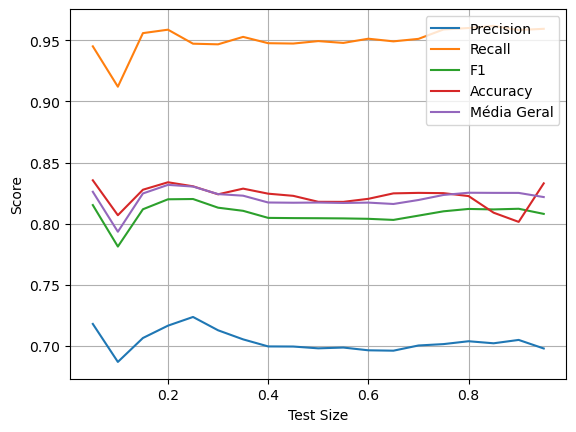

In [26]:
plt.plot(test_size, lista_precision, label='Precision')
plt.plot(test_size, lista_recall, label='Recall')
plt.plot(test_size, lista_f1, label='F1')
plt.plot(test_size, lista_acc, label='Accuracy')
plt.plot(test_size, lista_media_geral, label="Média Geral")
plt.legend()
plt.grid()
plt.xlabel('Test Size')
plt.ylabel('Score')
plt.show()